In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
nameCSV = 'melville_ACTUAL_FILEEE.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2998

In [3]:
for k in range(len(tt)):
    print wh[k], netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

1.3633999824523926 1985-04-05 21:27:30.469790
1.3511250019073486 1985-04-14 09:26:31.513184
1.34530770778656 1985-05-07 11:06:14.088943
2.0326924324035645 1985-05-30 12:45:54.566106
1.6260000467300415 1985-06-02 12:54:42.804684
0.9227856993675232 1985-06-25 14:34:14.719868
1.345666766166687 1985-08-10 17:53:29.313367
2.313499927520752 1985-09-02 19:32:58.781247
2.4012999534606934 1985-09-05 19:41:45.054690
1.3407059907913208 1985-09-28 21:21:12.227023
0.32442858815193176 1985-10-16 11:10:26.379465
1.9190832376480105 1985-11-08 12:49:40.654948
1.4140626192092896 1985-11-14 00:39:52.969910
1.2756000757217407 1985-12-07 02:18:58.426560
0.5147500038146973 1986-01-19 17:56:10.249999
0.3118000030517578 1986-02-11 19:35:15.709374
0.5635000467300415 1986-03-12 09:03:50.362630
2.66937518119812 1986-04-04 10:42:45.532226
1.7990001440048218 1986-04-07 10:51:29.847656
0.3752500414848328 1986-04-27 12:21:35.900392
1.867833495140076 1986-04-30 12:30:16.296876
2.049000024795532 1986-05-20 14:00:18.82

3.058600187301636 2001-06-11 21:42:05.532812
1.45977783203125 2001-06-14 21:57:01.310764
1.763235330581665 2001-06-15 12:56:09.168657
2.7400002479553223 2001-06-17 09:29:09.101042
3.135500272115072 2001-06-19 09:50:54.792318
3.154470682144165 2001-06-21 00:40:40.442067
2.9010003407796225 2001-06-24 19:55:32.633682
1.9624615907669067 2001-06-28 22:54:56.823316
2.1423333485921225 2001-06-29 07:49:26.195964
2.095182180404663 2001-07-04 10:42:01.742189
1.8112222883436413 2001-07-04 17:54:03.904513
0.7982500195503235 2001-07-07 00:37:43.114640
0.8066666920979818 2001-07-09 05:47:57.763020
2.3935001373291014 2001-07-14 15:52:35.196874
2.0346922874450684 2001-07-16 00:07:50.588904
2.678090875799006 2001-07-19 03:46:29.019531
2.135000228881836 2001-07-20 12:55:57.516544
2.0204668045043945 2001-07-21 11:54:53.023437
2.1394445631239147 2001-07-24 13:51:06.821181
2.223470687866211 2001-07-26 00:40:27.754481
2.1249165534973145 2001-07-29 01:45:00.474854
1.7769166231155396 2001-08-02 01:20:40.35384

2.0035454143177382 2009-06-22 12:36:21.539062
1.0995555453830297 2009-06-27 22:40:59.093750
0.9517500400543212 2009-07-02 10:34:52.882812
1.0299999713897705 2009-07-03 12:26:36.128126
1.3687000274658203 2009-07-07 20:39:30.553125
1.7486001253128052 2009-07-09 00:11:07.571599
1.6138332684834795 2009-07-12 08:33:24.805339
2.087300109863281 2009-07-17 18:38:02.009376
2.326083501180013 2009-07-22 06:31:56.318360
2.29800033569336 2009-07-25 00:08:14.791703
1.9278888702392576 2009-07-27 16:36:33.807293
2.9241669972737636 2009-08-01 04:30:26.990885
2.7077778710259333 2009-08-06 14:35:05.097222
2.6441338062286377 2009-08-07 12:26:35.592188
1.3745835622151692 2009-08-11 02:28:58.864257
1.5964665412902832 2009-08-13 00:11:07.326798
2.054444630940756 2009-08-16 12:33:36.119792
1.9673334757486982 2009-08-21 00:27:29.495685
0.9557778040568032 2009-08-26 10:32:07.551215
1.6144667863845823 2009-08-29 00:08:13.796403
1.2436668078104656 2009-08-30 22:26:01.231771
1.1578888363308375 2009-09-05 08:30:39.

1.2601766025318821 2014-10-26 21:48:27.681986
1.3804168701171875 2014-10-27 21:45:55.611979
0.9036667082044814 2014-10-28 21:46:00.539063
1.0344444910685222 2014-11-02 07:50:33.765623
1.3132499853769941 2014-11-06 19:44:27.723957
1.2666667302449544 2014-11-12 05:49:05.845052
1.4857059927547682 2014-11-15 08:52:29.350644
1.0089999834696453 2014-11-16 17:42:59.255209
0.7606111632453071 2014-11-17 08:50:03.224393
0.8835000991821289 2014-11-19 08:47:34.027344
0.9337778091430664 2014-11-22 03:47:37.298177
1.1916110780504017 2014-11-22 20:25:54.264757
1.3674000740051269 2014-11-24 20:23:23.617188
1.1452500820159912 2014-11-24 20:23:32.107423
1.5331665674845378 2014-11-26 15:41:31.092449
0.8044444719950358 2014-12-02 01:46:07.830729
1.2961667378743489 2014-12-02 07:07:41.007813
0.3967500329017639 2014-12-06 23:40:22.275240
0.4175000190734863 2014-12-11 23:44:39.349607
0.7645000351799859 2014-12-14 07:27:23.829860
0.3662500083446503 2014-12-16 07:24:59.718039
0.4974545999006792 2014-12-16 11:3

1.9720001220703125 2018-08-15 00:59:11.519233
1.7299167315165205 2018-08-16 02:21:03.353679
1.2848823771757238 2018-08-17 00:56:45.445571
1.2452353239059448 2018-08-18 00:10:16.999999
1.7685556411743164 2018-08-21 12:25:40.715279
1.1522857121058874 2018-08-24 11:09:54.074778
1.0468000411987304 2018-08-25 23:40:01.896875
1.1555455814708362 2018-08-26 00:19:34.812856
1.1103333367241754 2018-08-31 10:24:12.519964
1.2407647301169002 2018-09-03 12:03:17.260570
1.365705966949463 2018-09-03 12:25:11.000001
1.308545546098189 2018-09-04 22:18:06.963069
1.2310556835598416 2018-09-05 12:00:51.194444
1.2690000534057615 2018-09-07 11:58:17.695315
2.2844283694312693 2018-09-10 07:40:04.254465
2.1778892940945096 2018-09-10 08:22:45.121528
2.4927779303656683 2018-09-10 23:36:42.648439
2.200750160217285 2018-09-11 20:10:11.246874
1.9552354251637176 2018-09-12 23:34:16.057905
2.5584704875946045 2018-09-14 00:10:19
1.931583404541016 2018-09-14 20:16:38.707032
1.8499412536621092 2018-09-14 23:31:49.711397

In [4]:
print len(tt)

2998


In [5]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


In [6]:
y1985 = []
y1986 = []
y1987 = []
y1988 = []
y1992 = []
y1993 = []
y1994 = []
y1995 = []
y1996 = []
y1997 = []
y1998 = []
y1999 = []
y2000 = []
y2001 = []
y2002 = []
y2003 = []
y2004 = []
y2005 = []
y2006 = []
y2007 = []
y2008 = []
y2009 = []
y2010 = []
y2011 = []
y2012 = []
y2013 = []
y2014 = []
y2015 = []
y2016 = []
y2017 = []
y2018 = []



for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    if dt.year == 1985:
        y1985.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1986:
        y1986.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1987:
        y1987.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1988:
        y1988.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1992:
        y1992.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1993:
        y1993.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1994:
        y1994.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1995:
        y1995.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1996:
        y1996.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1997:
        y1997.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1998:
        y1998.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1999:
        y1999.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2000:
        y2000.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2001:
        y2001.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2002:
        y2002.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2003:
        y2003.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2004:
        y2004.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2005:
        y2005.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2006:
        y2006.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2007:
        y2007.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2008:
        y2008.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2009:
        y2009.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2010:
        y2010.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2011:
        y2011.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2012:
        y2012.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2013:
        y2013.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2014:
        y2014.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2015:
        y2015.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2016:
        y2016.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2017:
        y2017.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2018:
        y2018.append(np.mean(wh[days[k]:days[k+1]]))

In [7]:
print 'mean wh 1985', np.mean(y1985), np.std(y1985)
print 'mean wh 1986', np.mean(y1986)
print 'mean wh 1987', np.mean(y1987)
print 'mean wh 1988', np.mean(y1988)
print 'mean wh 1992', np.mean(y1992)
print 'mean wh 1993', np.mean(y1993)
print 'mean wh 1994', np.mean(y1994)
print 'mean wh 1995', np.mean(y1995)
print 'mean wh 1996', np.mean(y1996)
print 'mean wh 1997', np.mean(y1997)
print 'mean wh 1998', np.mean(y1998)
print 'mean wh 1999', np.mean(y1999)
print 'mean wh 2000', np.mean(y2000)
print 'mean wh 2001', np.mean(y2001)
print 'mean wh 2002', np.mean(y2002)
print 'mean wh 2003', np.mean(y2003)
print 'mean wh 2004', np.mean(y2004)
print 'mean wh 2005', np.mean(y2005)
print 'mean wh 2006', np.mean(y2006)
print 'mean wh 2007', np.mean(y2007)
print 'mean wh 2008', np.mean(y2008)
print 'mean wh 2009', np.mean(y2009)
print 'mean wh 2010', np.mean(y2010)
print 'mean wh 2011', np.mean(y2011)
print 'mean wh 2012', np.mean(y2012)
print 'mean wh 2013', np.mean(y2013)
print 'mean wh 2014', np.mean(y2014)
print 'mean wh 2015', np.mean(y2015)
print 'mean wh 2016', np.mean(y2016)
print 'mean wh 2017', np.mean(y2017)
print 'mean wh 2018', np.mean(y2018)

mean wh 1985 1.4982612878084183 0.5234624307774274
mean wh 1986 1.309945523738861
mean wh 1987 1.5783185437321663
mean wh 1988 2.1694527149200438
mean wh 1992 1.258558120264234
mean wh 1993 1.6796814849175574
mean wh 1994 1.7112576774391282
mean wh 1995 1.789001262742264
mean wh 1996 1.4785320282208314
mean wh 1997 1.7464691463653879
mean wh 1998 1.751215879321561
mean wh 1999 1.8000515091504914
mean wh 2000 1.568808399075119
mean wh 2001 1.555845897234906
mean wh 2002 1.7019042080449398
mean wh 2003 1.7199111930255233
mean wh 2004 1.715397665983644
mean wh 2005 1.827526357024908
mean wh 2006 1.6690995816526741
mean wh 2007 1.5821953311010644
mean wh 2008 1.7792626540447554
mean wh 2009 1.6263523886503592
mean wh 2010 1.6892794783238576
mean wh 2011 1.6019961354435028
mean wh 2012 1.646649460105354
mean wh 2013 1.7581517080831066
mean wh 2014 1.7269298529825794
mean wh 2015 1.657133793059638
mean wh 2016 1.5915344760559869
mean wh 2017 1.6384018352913126
mean wh 2018 1.5180718840725533

In [8]:
overall = [
np.mean(y1985), 
np.mean(y1986),
np.mean(y1987),
np.mean(y1988),
np.mean(y1992),
np.mean(y1993),
np.mean(y1994),
np.mean(y1995),
np.mean(y1996),
np.mean(y1997),
np.mean(y1998),
np.mean(y1999),
np.mean(y2000),
np.mean(y2001),
np.mean(y2002),
np.mean(y2003),
np.mean(y2004),
np.mean(y2005),
np.mean(y2006),
np.mean(y2007),
np.mean(y2008),
np.mean(y2009),
np.mean(y2010),
np.mean(y2011),
np.mean(y2012),
np.mean(y2013),
np.mean(y2014),
np.mean(y2015),
np.mean(y2016),
np.mean(y2017),
np.mean(y2018)]

label = [
'1985',
'1986',
'1987',
'1988',
'1992',
'1993',
'1994',
'1995',
'1996',
'1997',
'1998',
'1999',
'2000',
'2001',
'2002',
'2003',
'2004',
'2005',
'2006',
'2007',
'2008',
'2009',
'2010',
'2011',
'2012',
'2013',
'2014',
'2015',
'2016',
'2017',
'2018']

stdev = [
np.std(y1985),
np.std(y1986),
np.std(y1987),
np.std(y1988),
np.std(y1992),
np.std(y1993),
np.std(y1994),
np.std(y1995),
np.std(y1996),
np.std(y1997),
np.std(y1998),
np.std(y1999),
np.std(y2000),
np.std(y2001),
np.std(y2002),
np.std(y2003),
np.std(y2004),
np.std(y2005),
np.std(y2006),
np.std(y2007),
np.std(y2008),
np.std(y2009),
np.std(y2010),
np.std(y2011),
np.std(y2012),
np.std(y2013),
np.std(y2014),
np.std(y2015),
np.std(y2016),
np.std(y2017),
np.std(y2018)]

print len(overall)
print len(label)
print len(stdev)

31
31
31


## Overall mean Hs for CBG 1985-2019: 

In [9]:
np.mean(overall)

1.6562966928347334

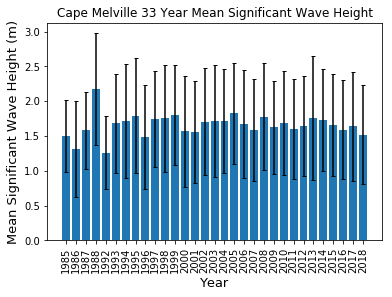

[6.0, 4.0]


In [10]:
index = np.arange(len(label))
plt.bar(index, overall, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Cape Melville 33 Year Mean Significant Wave Height')
plt.errorbar
plt.savefig('Cape Melville 33 Year Mean Significant Wave Height')
plt.show()

fig_size = plt.rcParams["figure.figsize"]
print fig_size